# Program 8 Comparison of various pre-trained models(ResNet, DenseNet, VGGNet)

In [5]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import warnings
import os 
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0' 
warnings.filterwarnings('ignore')
tf.test.gpu_device_name()

I0000 00:00:1730055622.898914    8887 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730055622.899107    8887 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730055622.899142    8887 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730055622.899790    8887 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-28 00:30:22.899827: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2112] Could not identify NUMA node of platform GPU id 0, defaulting to 0.  Your kernel may not have been built with NUMA support.

'/device:GPU:0'

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_dir=r'Data/train'
test_dir=r'Data/test'
train_data_genrator=ImageDataGenerator()
train_data=train_data_genrator.flow_from_directory(train_dir,target_size=(224,224),batch_size=32,class_mode='categorical')
test_data_generator=ImageDataGenerator()
test_data=test_data_generator.flow_from_directory(test_dir,target_size=(224,224),batch_size=32,class_mode='categorical')
num_classes=train_data.num_classes
print(num_classes)
train_data.class_indices

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.
3


{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}

In [3]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping=EarlyStopping(patience=3,monitor="val_loss")


In [4]:
def plot_curves(history):    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    # "Loss"
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

## Resnet 50

In [5]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import *
import tensorflow
resnet_50=ResNet50V2(input_shape=(224,224,3),classes=num_classes,include_top=False,weights='imagenet')
input=tensorflow.keras.layers.Input(name="Input_Layer",shape=(224,224,3))
# x=tf.keras.layers.Rescaling(1./255)(input)
x=resnet_50(input)
# x=tensorflow.keras.layers.GlobalAveragePooling2D()(x)
x=tensorflow.keras.layers.Flatten()(x)
x=tensorflow.keras.layers.Dense(512,activation='relu')(x)
output=tensorflow.keras.layers.Dense(num_classes,activation='softmax',name='Output_Layer')(x)
model_resnet_50=tf.keras.Model(inputs=input,outputs=output)


In [6]:
model_resnet_50.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer="adam")


In [13]:
history_resnet_50=model_resnet_50.fit(train_data,validation_data=test_data,epochs=5,callbacks=[early_stopping])

Epoch 1/5


I0000 00:00:1729364823.688180    2862 service.cc:146] XLA service 0x7fbe34018930 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729364823.689018    2862 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2024-10-20 00:37:05.109487: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-20 00:37:09.640899: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2024-10-20 00:37:11.757713: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_13818', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1729364859.625095    2862 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the proces

161/161 ━━━━━━━━━━━━━━━━━━━━ 282s 1s/step - accuracy: 0.8714 - loss: 1.4770 - val_accuracy: 0.8137 - val_loss: 6.3186
Epoch 2/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 206s 1s/step - accuracy: 0.9565 - loss: 0.1400 - val_accuracy: 0.5629 - val_loss: 2.6648
Epoch 3/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 271s 2s/step - accuracy: 0.8969 - loss: 0.5134 - val_accuracy: 0.5481 - val_loss: 7.0901
Epoch 4/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 178s 1s/step - accuracy: 0.9473 - loss: 0.1671 - val_accuracy: 0.9550 - val_loss: 0.1234
Epoch 5/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.9567 - loss: 0.1276 - val_accuracy: 0.7865 - val_loss: 0.4689


In [7]:
model_resnet_50.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50v2 (Functional)         │ (None, 7, 7, 2048)     │    23,564,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    51,380,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,947,075 (285.90 MB)

 Trainable params: 74,901,635 (285.73 MB)

 Non-trainable params: 45,440 (177.50 KB)

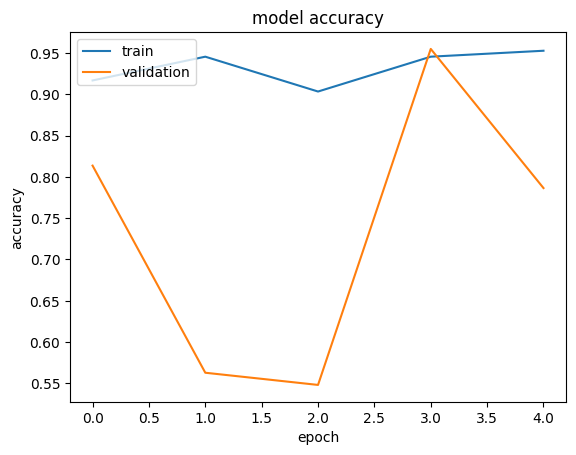

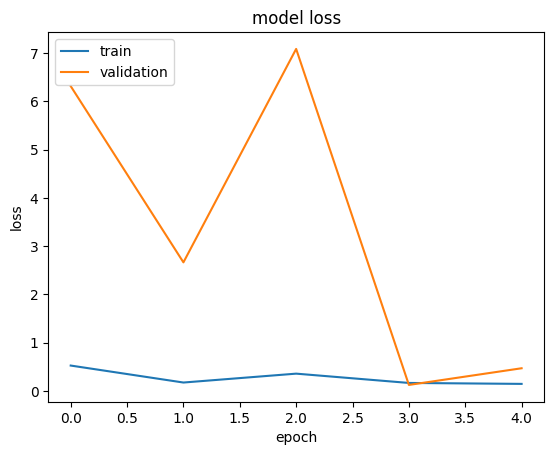

In [14]:
plot_curves(history_resnet_50)


In [15]:
model_resnet_50.save("resnet50.keras")

## DenseNet

In [7]:
from tensorflow.keras.applications import DenseNet201
densenet_201=DenseNet201(input_shape=(224,224,3),classes=num_classes,include_top=False,weights='imagenet')
input=Input(name="Input_Layer",shape=(224,224,3))
x=tf.keras.layers.Rescaling(1./255)(input)
x=densenet_201(x)
x=GlobalAveragePooling2D()(x)
x=Dense(512, activation='relu')(x)
x=Dropout(0.5)(x)
# x=GlobalAveragePooling2D()(x)
# x=Dropout(0.2)(x)
# x=tensorflow.keras.layers.Flatten()(x)
# x=tensorflow.keras.layers.Dense(512,activation='relu')(x)
output=Dense(num_classes,activation='softmax',name='Output_Layer')(x)
model_densenet_201=tf.keras.Model(input,output)

In [15]:
# from tensorflow.keras import layers
# input_shape=(224,224,3)
# input = Input(name="Input_Layer", shape=input_shape)
# x = tf.keras.layers.Rescaling(1./255)(input)  # Normalize input
# x = densenet_201(x)
# x = layers.GlobalAveragePooling2D()(x)  # Pool the features
# x = layers.Dense(512, activation='relu')(x)  # Fully connected layer
# x = layers.Dropout(0.5)(x)  # Dropout to prevent overfitting
# output = layers.Dense(num_classes, activation='softmax', name='Output_Layer')(x)  # Output layer

# # Define the model
# model_densenet_201 = tf.keras.Model(inputs=input, outputs=output)

In [9]:
model_densenet_201.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer="adam")

In [10]:
model_densenet_201.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ densenet201 (Functional)        │ (None, 7, 7, 1920)     │    18,321,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1920)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       983,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,307,075 (73.65 MB)

 Trainable params: 19,078,019 (72.78 MB)

 Non-trainable params: 229,056 (894.75 KB)

In [ ]:
history_densenet_201=model_densenet_201.fit(train_data,validation_data=test_data,epochs=5,callbacks=[early_stopping])


Epoch 1/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 1361s 8s/step - accuracy: 0.8717 - loss: 0.3804 - val_accuracy: 0.5994 - val_loss: 2.4119
Epoch 2/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 1050s 6s/step - accuracy: 0.9541 - loss: 0.1301 - val_accuracy: 0.8634 - val_loss: 0.4625
Epoch 3/5
139/161 ━━━━━━━━━━━━━━━━━━━━ 3:36 10s/step - accuracy: 0.9532 - loss: 0.1416

In [ ]:
plot_curves(history_densenet_201)


In [ ]:
test_loss_densenet, test_acc_densenet = model_densenet_201.evaluate(test_data)


In [ ]:
model_densenet_201.save("Densenet.keras")

## VGG NET

In [9]:
from tensorflow.keras import Model
vgg_model_load = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg_model=vgg_model_load.output
x = tensorflow.keras.layers.GlobalAveragePooling2D()(vgg_model)  
x = tensorflow.keras.layers.Dense(1024, activation='relu')(x) 
predictions = tensorflow.keras.layers.Dense(num_classes, activation='softmax')(x)
vgg_model=Model(inputs=vgg_model_load.input,outputs=predictions)
early_stopping=EarlyStopping(patience=3,monitor="val_loss")

In [10]:
vgg_model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │         3,075 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,243,075 (58.15 MB)

 Trainable params: 15,243,075 (58.15 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
vgg_model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])


In [12]:
history=vgg_model.fit(x=train_data,validation_data=test_data,epochs=5,callbacks=[early_stopping],verbose=1)


Epoch 1/5


I0000 00:00:1729431148.937072   14865 service.cc:146] XLA service 0x7ff53802eb50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729431148.937197   14865 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2024-10-20 19:02:29.079536: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-20 19:02:29.677340: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2024-10-20 19:02:31.561859: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1591', 32 bytes spill stores, 32 bytes spill loads

2024-10-20 19:02:31.569842: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memor

 97/161 ━━━━━━━━━━━━━━━━━━━━ 1:05 1s/step - accuracy: 0.5553 - loss: 8.3484

2024-10-20 19:04:40.817069: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1591', 32 bytes spill stores, 32 bytes spill loads

2024-10-20 19:04:41.270857: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1220', 256 bytes spill stores, 256 bytes spill loads

2024-10-20 19:04:41.373010: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1220', 12 bytes spill stores, 12 bytes spill loads

2024-10-20 19:04:41.530234: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1591', 32 bytes spill stores, 32 bytes spill loads

2024-10-20 19:04:41.798823: I external/local_xla/xla/strea

161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5890 - loss: 5.9619

2024-10-20 19:07:08.001370: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_222', 12 bytes spill stores, 12 bytes spill loads



161/161 ━━━━━━━━━━━━━━━━━━━━ 295s 2s/step - accuracy: 0.5894 - loss: 5.9374 - val_accuracy: 0.7422 - val_loss: 0.5834
Epoch 2/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 219s 1s/step - accuracy: 0.7246 - loss: 0.5987 - val_accuracy: 0.8377 - val_loss: 0.3986
Epoch 3/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 179s 1s/step - accuracy: 0.8397 - loss: 0.3897 - val_accuracy: 0.8960 - val_loss: 0.2508
Epoch 4/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 210s 1s/step - accuracy: 0.8824 - loss: 0.2981 - val_accuracy: 0.8967 - val_loss: 0.2480
Epoch 5/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 210s 1s/step - accuracy: 0.9040 - loss: 0.2377 - val_accuracy: 0.9410 - val_loss: 0.1665


In [13]:
test_loss_vgg, test_acc_vgg = vgg_model.evaluate(test_data)


41/41 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.9341 - loss: 0.1843


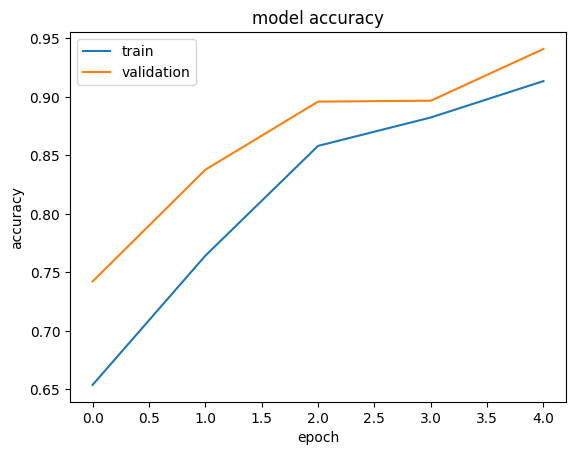

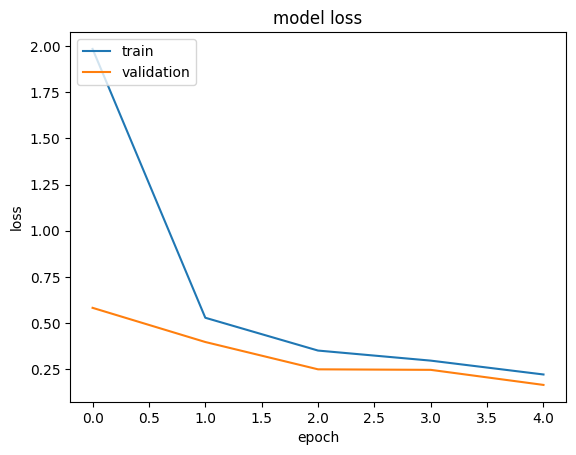

In [14]:
plot_curves(history)

In [15]:
vgg_model.save("vgg16_Mri.keras")
